In [2]:
from pyspark.sql import SparkSession

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
import seaborn as sns
from scipy import stats
import pymprog as pm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT','FB','V','WMT','PG','XOM','NSANY','ORCL','COST','CRM','NKE','JNJ','TMO','JPM',
          'UNH','CI','INTC','CSCO','T','KO','DIS','UPS','NFLX','GM','HLT','PFE']
multpl_stocks = web.get_data_yahoo(tickers,start = "2015-01-01", end = "2020-12-31")

In [5]:
multpl_stocks

Attributes   Adj Close                                                   \
Symbols           AAPL        MSFT         AMZN        TSLA         TGT   
Date                                                                      
2015-01-02   24.861401   41.443684   308.519989   43.862000   62.301720   
2015-01-05   24.161013   41.062580   302.190002   42.018002   61.185211   
2015-01-06   24.163294   40.459892   295.290009   42.256001   61.176929   
2015-01-07   24.502111   40.973934   298.420013   42.189999   63.492664   
2015-01-08   25.443539   42.179317   300.459991   42.124001   63.790409   
...                ...         ...          ...         ...         ...   
2020-12-24  131.773087  222.238144  3172.689941  661.770020  174.567688   
2020-12-28  136.486053  224.443069  3283.959961  663.690002  175.763428   
2020-12-29  134.668762  223.634918  3322.000000  665.989990  174.418213   
2020-12-30  133.520477  221.170593  3285.850098  694.780029  173.262344   
2020-12-31  132.492020  221.908905  3256.929932  705.669983  175.902924   

Attributes                                                             ...  \
Symbols             FB           V         WMT          PG        XOM  ...   
Date                                                                   ...   
2015-01-02   78.449997   63.507534   74.245743   74.930771  69.679512  ...   
2015-01-05   77.190002   62.105679   74.029671   74.574486  67.772957  ...   
2015-01-06   76.150002   61.705475   74.600113   74.234802  67.412659  ...   
2015-01-07   76.150002   62.532223   76.579414   74.624222  68.095718  ...   
2015-01-08   78.180000   63.370945   78.195717   75.477577  69.229149  ...   
...                ...         ...         ...         ...        ...  ...   
2020-12-24  267.399994  208.376495  142.903351  136.894287  40.905334  ...   
2020-12-28  277.000000  212.300415  144.616196  137.848526  41.042999  ...   
2020-12-29  276.779999  214.037704  143.700027  137.590088  40.580849  ...   
2020-12-30  271.869995  218.021530  143.580521  136.943985  40.905334  ...   
2020-12-31  273.160004  218.390945  143.550644  138.305771  40.531681  ...   

Attributes      Volume                                                  \
Symbols           INTC        CSCO           T          KO         DIS   
Date                                                                     
2015-01-02  23605600.0  22926500.0  20564000.0   9921100.0   5865400.0   
2015-01-05  32785000.0  29460600.0  30429100.0  26292600.0   7789400.0   
2015-01-06  30847600.0  47297600.0  29595800.0  16897500.0   6793100.0   
2015-01-07  27725200.0  27570800.0  31660000.0  13412300.0   6589500.0   
2015-01-08  31765400.0  40907000.0  22799800.0  21743600.0   7579400.0   
...                ...         ...         ...         ...         ...   
2020-12-24  11865600.0   5720500.0  19153100.0   3265500.0   2721000.0   
2020-12-28  21269200.0  13458400.0  41619500.0   9020500.0  13145400.0   
2020-12-29  84531400.0  11829000.0  36617500.0   8320600.0   6875400.0   
2020-12-30  37385400.0  11043100.0  34347800.0   8142700.0  11680400.0   
2020-12-31  28576800.0  15105500.0  38622300.0   8495000.0   7073500.0   

Attributes                                                            
Symbols           UPS        NFLX          GM        HLT         PFE  
Date                                                                  
2015-01-02  2662900.0  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  3519600.0  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  3808900.0  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07  1949500.0   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08  2876100.0   9601900.0  15206600.0  2098489.0  49169522.0  
...               ...         ...         ...        ...         ...  
2020-12-24  1006100.0   1144000.0   7825400.0   822400.0  14790100.0  
2020-12-28  1861700.0   2891900.0  10471400.0  1575100.0  26993700.0  
2020-12-29  2864600.0   4022400.0   79

In [6]:
multpl_stocks.head()

Attributes  Adj Close                                                          \
Symbols          AAPL       MSFT        AMZN       TSLA        TGT         FB   
Date                                                                            
2015-01-02  24.861401  41.443684  308.519989  43.862000  62.301720  78.449997   
2015-01-05  24.161013  41.062580  302.190002  42.018002  61.185211  77.190002   
2015-01-06  24.163294  40.459892  295.290009  42.256001  61.176929  76.150002   
2015-01-07  24.502111  40.973934  298.420013  42.189999  63.492664  76.150002   
2015-01-08  25.443539  42.179317  300.459991  42.124001  63.790409  78.180000   

Attributes                                              ...      Volume  \
Symbols             V        WMT         PG        XOM  ...        INTC   
Date                                                    ...               
2015-01-02  63.507534  74.245743  74.930771  69.679512  ...  23605600.0   
2015-01-05  62.105679  74.029671  74.574486  67.772957  ...  32785000.0   
2015-01-06  61.705475  74.600113  74.234802  67.412659  ...  30847600.0   
2015-01-07  62.532223  76.579414  74.624222  68.095718  ...  27725200.0   
2015-01-08  63.370945  78.195717  75.477577  69.229149  ...  31765400.0   

Attributes                                                            \
Symbols           CSCO           T          KO        DIS        UPS   
Date                                                                   
2015-01-02  22926500.0  20564000.0   9921100.0  5865400.0  2662900.0   
2015-01-05  29460600.0  30429100.0  26292600.0  7789400.0  3519600.0   
2015-01-06  47297600.0  29595800.0  16897500.0  6793100.0  3808900.0   
2015-01-07  27570800.0  31660000.0  13412300.0  6589500.0  1949500.0   
2015-01-08  40907000.0  22799800.0  21743600.0  7579400.0  2876100.0   

Attributes                                                 
Symbols           NFLX          GM        HLT         PFE  
Date                                                       
2015-01-02  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08   9601900.0  15206600.0  2098489.0  49169522.0  

[5 rows x 180 columns]

In [7]:
#write to csv file function 
#creates a projectcsv.csv file in the Machine Learning project folder 
multpl_stocks.to_csv('projectcsv.csv', index = False)


In [ ]:
# DESCRIPTIVE ANALYSIS 

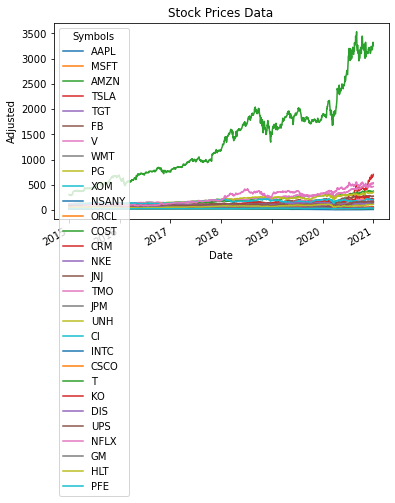

In [8]:
#plotting price trend for all stocks
multpl_stocks['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data')
plt.savefig('StockPricesData.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

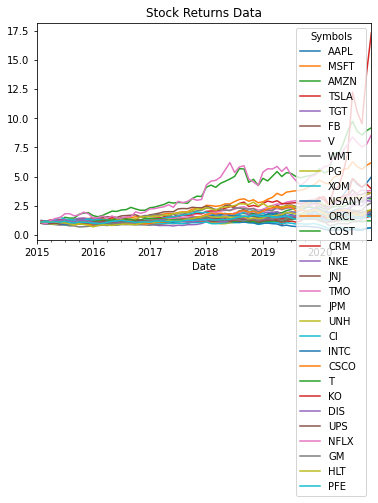

In [9]:
#Calculating amd plotting the returns for the stocks
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data')
plt.savefig('StockReturns.jpg')
plt.show()

In [10]:
#Calculating the Mean
print(multpl_stock_monthly_returns.mean())

Symbols
AAPL     0.026334
MSFT     0.027749
AMZN     0.035140
TSLA     0.055075
TGT      0.018190
FB       0.021018
V        0.019559
WMT      0.010839
PG       0.010422
XOM     -0.004048
NSANY   -0.002859
ORCL     0.008828
COST     0.017343
CRM      0.022816
NKE      0.018754
JNJ      0.009766
TMO      0.020612
JPM      0.016683
UNH      0.019914
CI       0.012247
INTC     0.010652
CSCO     0.012441
T        0.004044
KO       0.007759
DIS      0.013588
UPS      0.012812
NFLX     0.036538
GM       0.010744
HLT      0.014268
PFE      0.007960
dtype: float64


In [11]:
# Calculating the standard deviation
print(multpl_stock_monthly_returns.std())

Symbols
AAPL     0.084552
MSFT     0.060164
AMZN     0.084895
TSLA     0.182342
TGT      0.081219
FB       0.077249
V        0.054620
WMT      0.052286
PG       0.041580
XOM      0.073185
NSANY    0.086063
ORCL     0.053169
COST     0.051712
CRM      0.084677
NKE      0.062279
JNJ      0.046217
TMO      0.058618
JPM      0.068868
UNH      0.057442
CI       0.075995
INTC     0.070893
CSCO     0.069163
T        0.052161
KO       0.042773
DIS      0.077076
UPS      0.073492
NFLX     0.112053
GM       0.091453
HLT      0.079443
PFE      0.061033
dtype: float64


In [12]:
#Calculating the correlation
print(multpl_stock_monthly_returns.corr())

Symbols      AAPL      MSFT      AMZN      TSLA       TGT        FB         V  \
Symbols                                                                         
AAPL     1.000000  0.589136  0.455936  0.486643  0.303657  0.514251  0.583701   
MSFT     0.589136  1.000000  0.671252  0.319914  0.174855  0.440422  0.675558   
AMZN     0.455936  0.671252  1.000000  0.291478  0.128286  0.573966  0.622053   
TSLA     0.486643  0.319914  0.291478  1.000000  0.186778  0.321589  0.391266   
TGT      0.303657  0.174855  0.128286  0.186778  1.000000  0.313463  0.344026   
FB       0.514251  0.440422  0.573966  0.321589  0.313463  1.000000  0.578714   
V        0.583701  0.675558  0.622053  0.391266  0.344026  0.578714  1.000000   
WMT      0.218952  0.154659  0.127529  0.153927  0.333641  0.194693  0.213353   
PG       0.354194  0.269411  0.173529  0.224235  0.067267  0.318188  0.256330   
XOM      0.342446  0.425144  0.359695  0.234677  0.369874  0.411071  0.545646   
NSANY    0.467853  0.478746 

In [13]:
#Calculating the covariance
print(multpl_stock_monthly_returns.cov())

Symbols      AAPL      MSFT      AMZN      TSLA       TGT        FB         V  \
Symbols                                                                         
AAPL     0.007149  0.002997  0.003273  0.007503  0.002085  0.003359  0.002696   
MSFT     0.002997  0.003620  0.003429  0.003510  0.000854  0.002047  0.002220   
AMZN     0.003273  0.003429  0.007207  0.004512  0.000885  0.003764  0.002884   
TSLA     0.007503  0.003510  0.004512  0.033249  0.002766  0.004530  0.003897   
TGT      0.002085  0.000854  0.000885  0.002766  0.006596  0.001967  0.001526   
FB       0.003359  0.002047  0.003764  0.004530  0.001967  0.005967  0.002442   
V        0.002696  0.002220  0.002884  0.003897  0.001526  0.002442  0.002983   
WMT      0.000968  0.000487  0.000566  0.001468  0.001417  0.000786  0.000609   
PG       0.001245  0.000674  0.000613  0.001700  0.000227  0.001022  0.000582   
XOM      0.002119  0.001872  0.002235  0.003132  0.002199  0.002324  0.002181   
NSANY    0.003404  0.002479 

Symbols      AAPL      MSFT      AMZN      TSLA       TGT        FB         V  \
Symbols                                                                         
AAPL     1.000000  0.589136  0.455936  0.486643  0.303657  0.514251  0.583701   
MSFT     0.589136  1.000000  0.671252  0.319914  0.174855  0.440422  0.675558   
AMZN     0.455936  0.671252  1.000000  0.291478  0.128286  0.573966  0.622053   
TSLA     0.486643  0.319914  0.291478  1.000000  0.186778  0.321589  0.391266   
TGT      0.303657  0.174855  0.128286  0.186778  1.000000  0.313463  0.344026   
FB       0.514251  0.440422  0.573966  0.321589  0.313463  1.000000  0.578714   
V        0.583701  0.675558  0.622053  0.391266  0.344026  0.578714  1.000000   
WMT      0.218952  0.154659  0.127529  0.153927  0.333641  0.194693  0.213353   
PG       0.354194  0.269411  0.173529  0.224235  0.067267  0.318188  0.256330   
XOM      0.342446  0.425144  0.359695  0.234677  0.369874  0.411071  0.545646   
NSANY    0.467853  0.478746 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

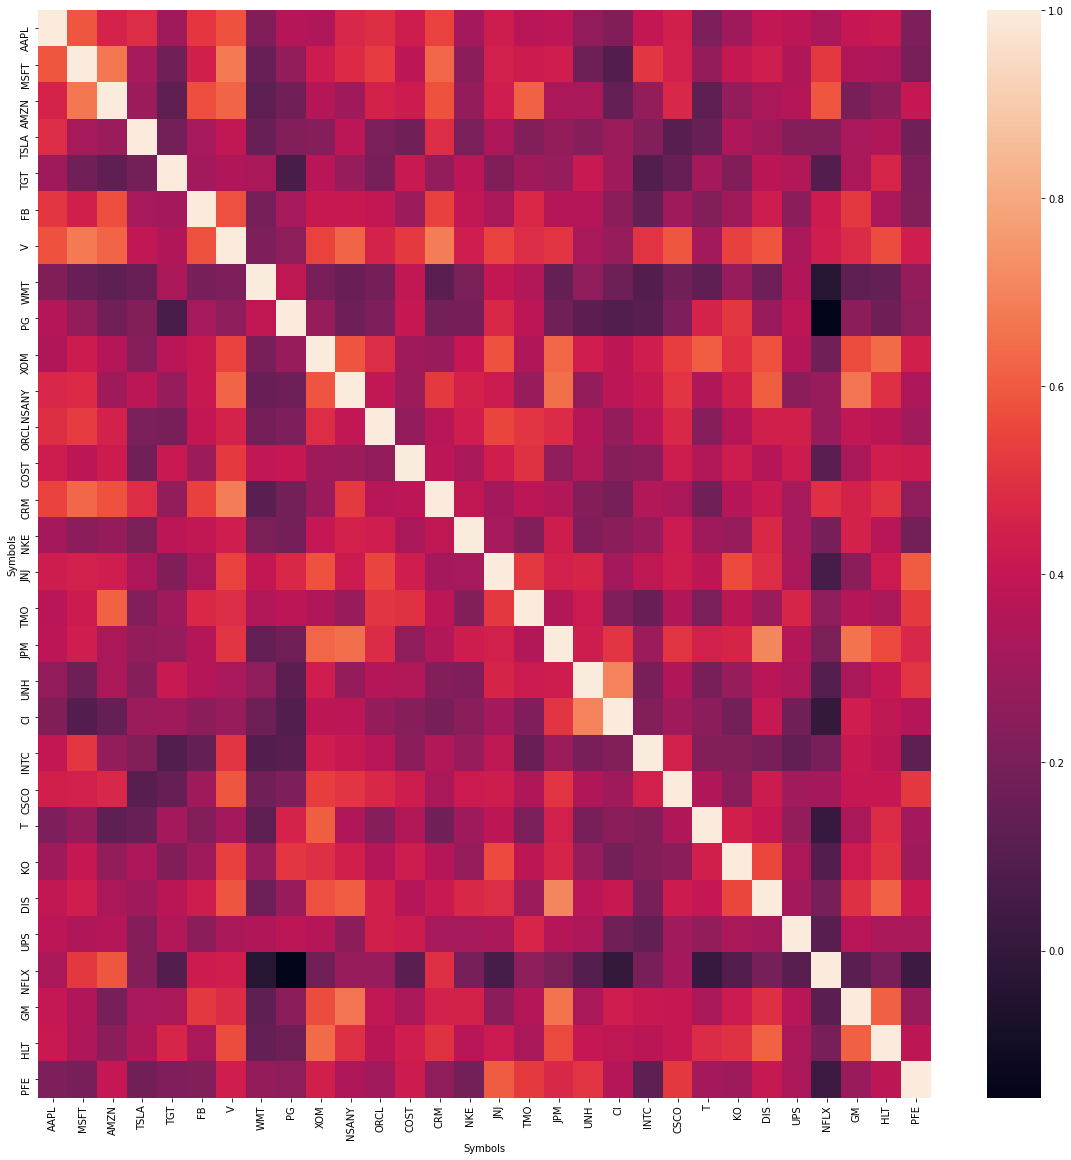

In [15]:
# Heatmap to show correclation of the returns of each stock to the other
plt.subplots(figsize=(20,20))
corr=multpl_stock_monthly_returns.corr()
print(corr)
sns.heatmap(corr)